<a id='top'></a>
# Will the shots in? Predicting Kobe's Shots Using Decision Tree
Naufal Ahmad D. (https://github.com/naufalahmadd)

<a id='toc'></a>
## Table of Contents

<ul>
<li><a href="#toc">Table of Contents</a></li>
<li><a href="#importp">Import Packages</a></li>
<li><a href="#importd">Import Dataset</a></li>
<li><a href="#dtid">Data Tidying</a></li>
<li><a href="#dvis">Data Visualization</a></li>
<li><a href="#model">Modeling</a></li>
<li><a href="#modelev">Model Evaluation</a></li>  
</ul>

<a id='importp'></a>
## 1. Import Packages

<ul>
<a href="#top">back to top</a>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gs
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

%matplotlib inline

<a id='importd'></a>
## 2. Import Dataset

<ul>
<a href="#top">back to top</a>
</ul>

In [2]:
df = pd.read_csv('Dataset/data.csv')

In [3]:
df.shape

(30697, 25)

<a id='importd'></a>
## 3. Data Tidying

<ul>
<a href="#top">back to top</a>
</ul>

In [4]:
df = df.dropna(subset=['shot_made_flag'])

In [5]:
df['shot_made_flag'].isnull().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [7]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [8]:
for col in df:
    if df[col].dtype.name == 'object':
        print(col)
        print(df[col].unique())

action_type
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 

In [9]:
df['game_date'] = pd.to_datetime(df['game_date'])

In [10]:
df['shot_made_flag'].value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

<a id='dvis'></a>
## 4. Data Visualization

<ul>
<a href="#top">back to top</a>
</ul>

In [11]:
colors = np.where(df['shot_made_flag'] == 1, 'Dodgerblue', 'Crimson')
colors.shape

(25697,)

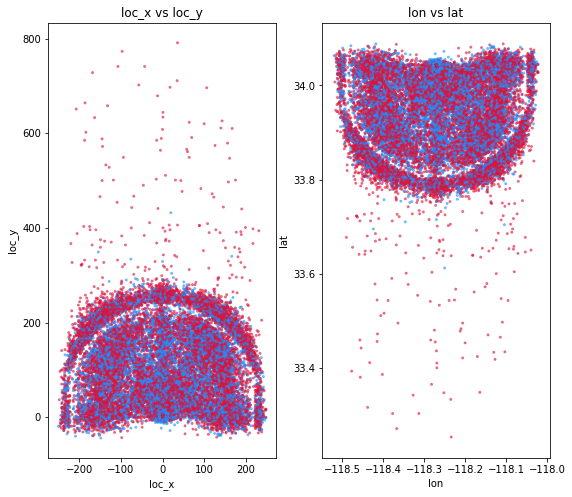

In [12]:
plt.figure(figsize=(9, 8))

plt.subplot(121) # 1 row, 2 cols, plot num 1
plt.title('loc_x vs loc_y')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
plt.scatter(df.loc_x, df.loc_y, color = colors, s = 4, alpha = 0.5)

plt.subplot(122)
plt.title('lon vs lat')
plt.xlabel('lon')
plt.ylabel('lat')
plt.scatter(df.lon, df.lat, color = colors, s = 4, alpha = 0.5);

In [13]:
df['shot_made_flag'].value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [14]:
for column, frame in df.groupby('shot_zone_area'):
    print('column: {0}, frame: {1}'.format(column, len(frame)))

column: Back Court(BC), frame: 72
column: Center(C), frame: 11289
column: Left Side Center(LC), frame: 3364
column: Left Side(L), frame: 3132
column: Right Side Center(RC), frame: 3981
column: Right Side(R), frame: 3859


In [15]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

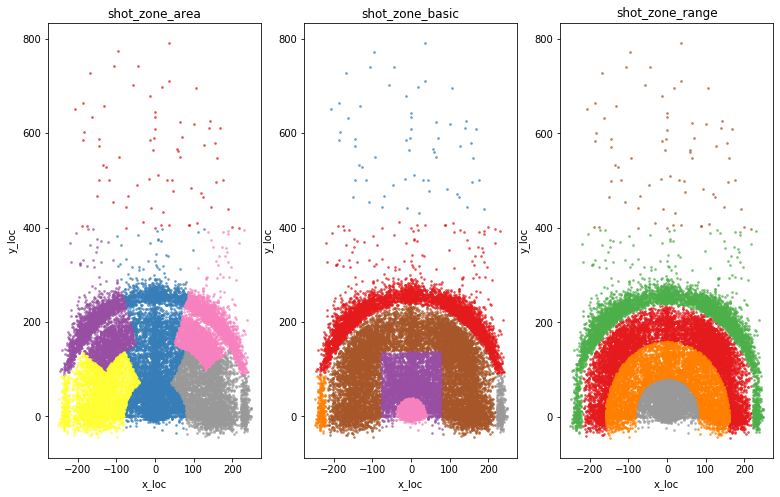

In [16]:
# KALO bisa bikin ini berdasarkan masuk apa ngga, berarti situ paham
def grouped_plot(feature):
    groups = df.groupby(feature)
    colors = cm.Set1(np.linspace(0, 1, len(groups)))
    for g, c in zip(groups, colors):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, s = 3, alpha = 0.6)
        
plt.figure(figsize=(13, 8))

plt.subplot(131)
plt.title('shot_zone_area')
plt.xlabel('x_loc')
plt.ylabel('y_loc')
grouped_plot('shot_zone_area')

plt.subplot(132)
plt.title('shot_zone_basic')
plt.xlabel('x_loc')
plt.ylabel('y_loc')
grouped_plot('shot_zone_basic')

plt.subplot(133)
plt.title('shot_zone_range')
plt.xlabel('x_loc')
plt.ylabel('y_loc')
grouped_plot('shot_zone_range');

In [17]:
ins = df.loc[df['shot_made_flag'] == 1, ['shot_zone_area', 'shot_made_flag']].groupby('shot_zone_area')

In [18]:
rim = df.loc[df['shot_made_flag'] == 0, ['shot_zone_area', 'shot_made_flag']].groupby('shot_zone_area')

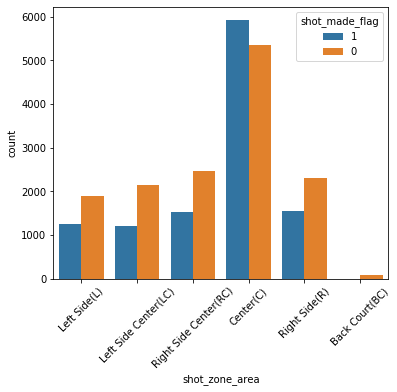

In [19]:
plt.figure(figsize=(6,5))
sns.countplot('shot_zone_area', hue='shot_made_flag', data=df, hue_order=[1,0])
plt.xticks(rotation=45);

In [20]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [21]:
def percentplot(feature):
    pd.DataFrame(
    data=df['shot_made_flag']
    .groupby(df[feature])
    .value_counts(normalize=True)
    ).sort_index(
    level=[0,1], ascending=[True, True]
    ).rename(
    columns={feature: 'ins_percentage'}
    ).unstack().plot(
    kind='bar', 
    stacked=True,
    color=['red', 'green'])
    plt.xticks(rotation=45)
    plt.legend(
        ['fail','success'],
        loc='upper right',
    )

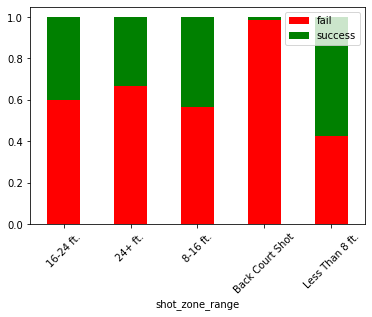

In [22]:
percentplot('shot_zone_range')

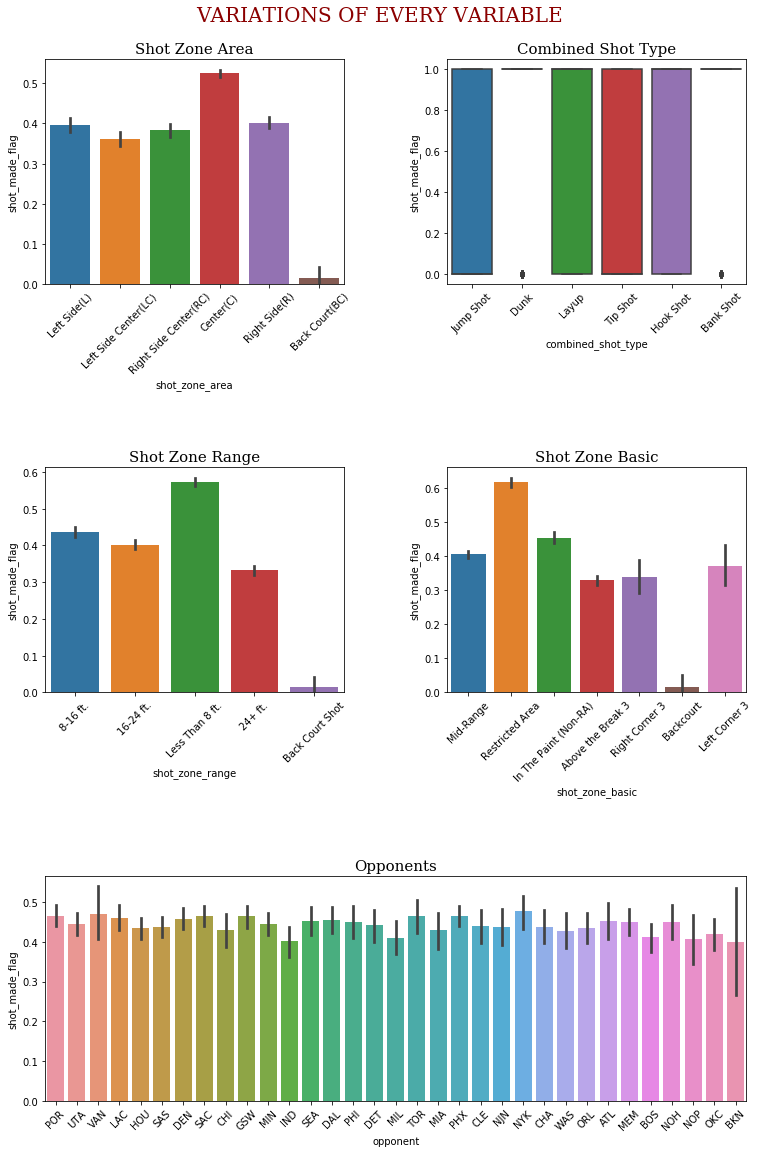

In [23]:
plt.figure(figsize=(12,17))
gs1 = gs.GridSpec(nrows=3, ncols=2)

sptitle = {
    'family': 'serif',
    'color': 'darkred'
       }
sbtitle = {
    'family': 'serif',
    'size': 15
       }


plt.subplot(gs1[0,0])
sns.barplot(x='shot_zone_area', y='shot_made_flag', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Shot Zone Area', fontdict=sbtitle)

plt.subplot(gs1[0,1])
sns.boxplot(x='combined_shot_type', y='shot_made_flag', data=df)
plt.xticks(rotation=45)
plt.title('Combined Shot Type', fontdict=sbtitle)

plt.subplot(gs1[1,0])
sns.barplot(x='shot_zone_range', y='shot_made_flag', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Shot Zone Range', fontdict=sbtitle)

plt.subplot(gs1[1,1])
sns.barplot(x='shot_zone_basic', y='shot_made_flag', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Shot Zone Basic', fontdict=sbtitle)

plt.subplot(gs1[2,0:2])
sns.barplot(x='opponent', y='shot_made_flag', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Opponents', fontdict=sbtitle)

plt.suptitle('VARIATIONS OF EVERY VARIABLE', fontdict=sptitle, fontsize=20)

plt.tight_layout(pad=6);

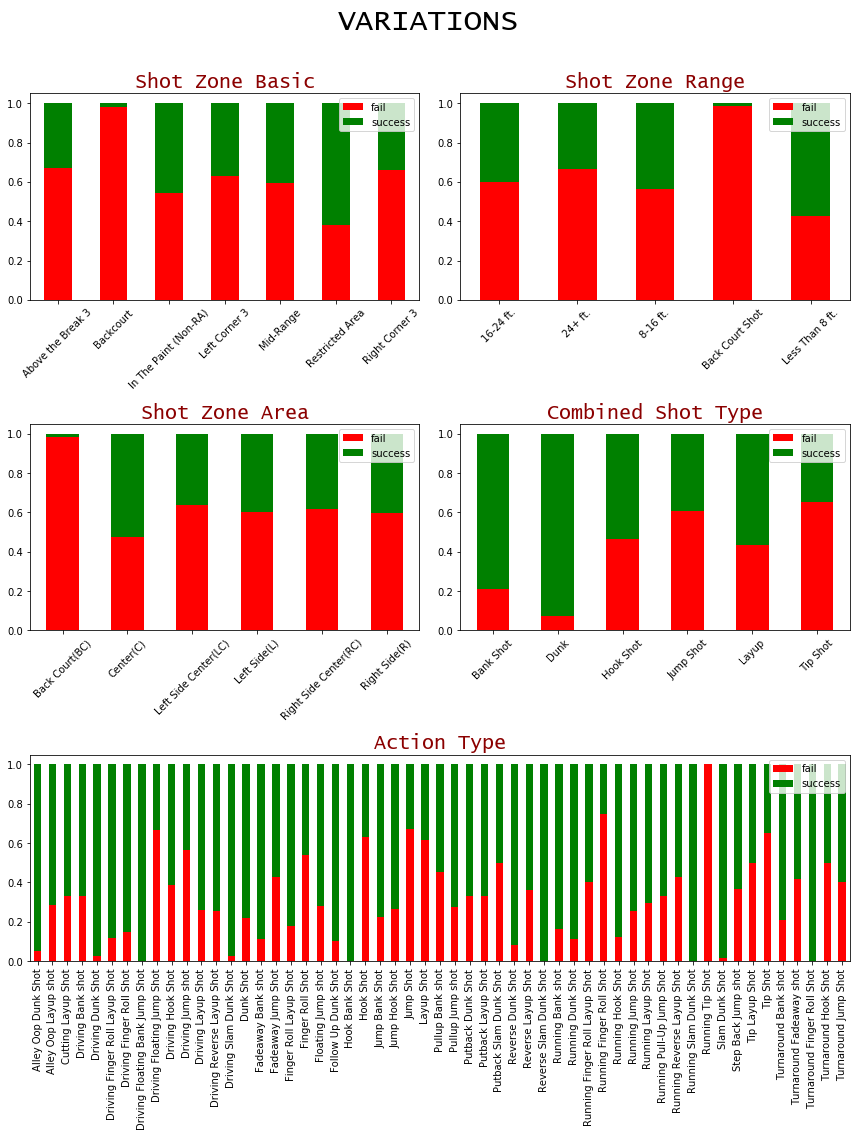

In [24]:
plt.figure(figsize=(12,15), facecolor='white')
gridsize = (3,2)
sptitle = {
    'name': 'Lucida Console',
    'color': 'black'
       }
sbtitle = {
    'name': 'Lucida Console',
    'size': 20,
    'color': 'darkred'
       }


def percentplot(feature, ax):
    shots = pd.DataFrame(
        data=df['shot_made_flag']
        .groupby(df[feature])
        .value_counts(normalize=True)).sort_index(
        level=[0,1], ascending=[True, True]
    ).rename(
        columns={feature: 'ins_percentage'}
    ).unstack(-1)
    shots.plot(
        kind='bar', 
        stacked=True,
        ax = ax,

        color=['red', 'green'])
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.legend(
        ['fail','success'],
        loc='upper right',
    )
    plt.title(feature.replace('_', ' ').title(),fontdict=sbtitle)
    

ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan=1) 
percentplot('shot_zone_basic', ax1)

ax2 = plt.subplot2grid(gridsize, (0, 1), rowspan=1) 
percentplot('shot_zone_range', ax2)

ax3 = plt.subplot2grid(gridsize, (1, 0), rowspan=1) 
percentplot('shot_zone_area', ax3)

ax4 = plt.subplot2grid(gridsize, (1, 1), rowspan=1) 
percentplot('combined_shot_type', ax4);

ax5 = plt.subplot2grid(gridsize, (2, 0), colspan=2) 
percentplot('action_type', ax5)
plt.xticks(rotation=90)

plt.suptitle('variations'.upper(), fontdict=sptitle, fontsize=30, y=1.05)
plt.tight_layout();

<a id='model'></a>
## 4. Modeling

<ul>
<a href="#top">back to top</a>
</ul>

### 4.1. Preprocessing

In [25]:
df.isnull().values.any()

False

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [30]:
df['action_type'].unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [28]:
print(np.corrcoef(df['loc_x'], df['lon']))
print(np.corrcoef(df['loc_y'], df['lat']))

[[1. 1.]
 [1. 1.]]
[[ 1. -1.]
 [-1.  1.]]


In [31]:
df['year'] = df['game_date'].dt.year
df['month'] = df['game_date'].dt.month
df['time_remaining'] = df['minutes_remaining']*60 + df['seconds_remaining']
df['away'] = df['matchup'].apply(lambda x: 1 if '@' in x else 0)
df =df.drop(
    ['game_event_id', 'game_id', 'minutes_remaining', 'season', 
     'seconds_remaining', 'team_id', 'team_name', 
     'game_date', 'shot_id', 'matchup', 'lon', 'lat', 'combined_shot_type'], axis=1)

df.head()

,action_type,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,year,month,time_remaining,away
1,Jump Shot,-157,0,1,0,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,622,1
2,Jump Shot,-101,135,1,0,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000,10,465,1
3,Jump Shot,138,175,1,0,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000,10,412,1
4,Driving Dunk Shot,0,0,2,0,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,2000,10,379,1
5,Jump Shot,-145,-11,3,0,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,572,1


In [32]:
df = pd.get_dummies(df)

### 4.2. The Decision Tree

In [33]:
loc_st = preprocessing.StandardScaler().fit(df[['loc_x', 'loc_y']]).transform(df[['loc_x', 'loc_y']])

In [34]:
df['angle'] = loc_st[:,0]/loc_st[:,1]
df = df.drop(columns=['loc_x', 'loc_y'])

In [35]:
X = df.drop(columns='shot_made_flag')
y = df.shot_made_flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
print(X_train.shape, X_test.shape)

(20557, 116) (5140, 116)


In [40]:
pipeline = Pipeline([
    ('algo', DecisionTreeClassifier())
])

In [41]:
parameter = {
    'algo__criterion': ['gini', 'entropy'],
    'algo__min_samples_leaf': np.arange(250, 5000, 250),
    'algo__class_weight': ['balanced', None]
}

model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)

In [42]:
model.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:   49.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('algo',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                       

In [48]:
model.best_params_.values()

dict_values(['balanced', 'gini', 750])

In [44]:
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

0.6800603200856156 0.6800608035824174 0.6733463035019456


In [52]:
clf = DecisionTreeClassifier(class_weight='balanced', criterion='gini', min_samples_leaf=750)

In [53]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=750, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

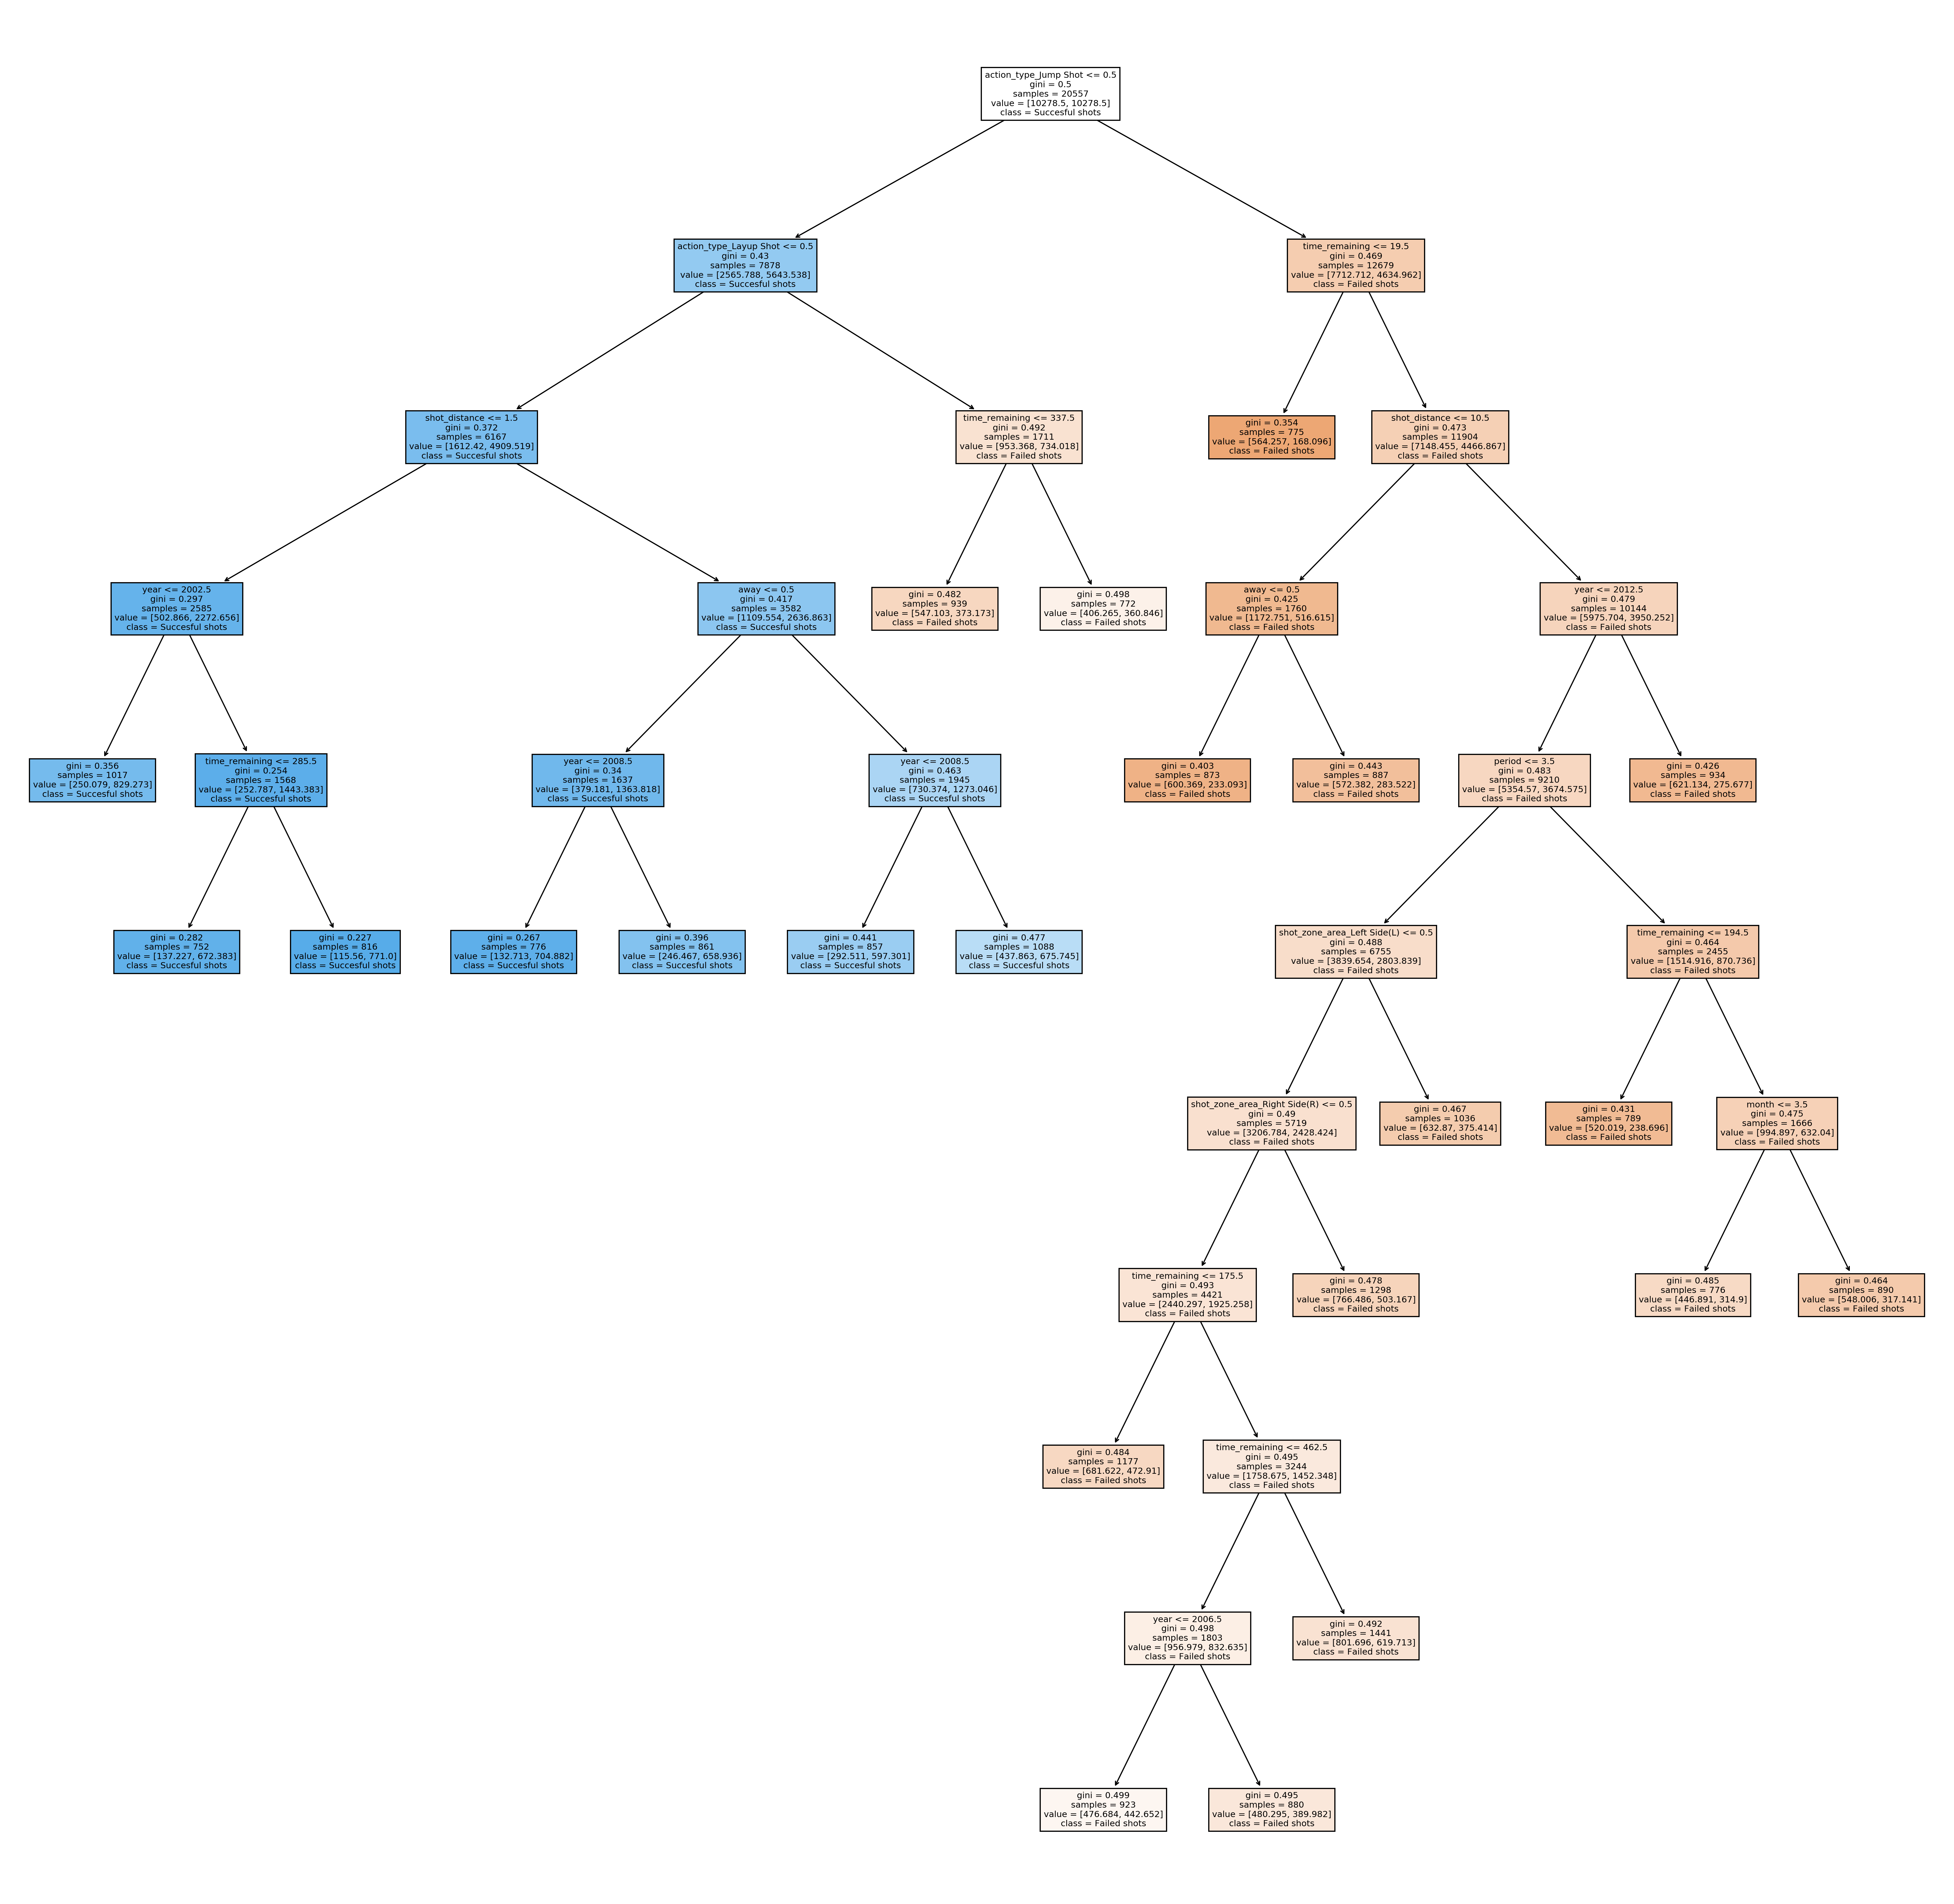

In [55]:
fn=X_train.columns
cn=['Failed shots', 'Succesful shots']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,30), dpi=300)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

<a id='modelev'></a>
## 5. Evaluation

<ul>
<a href="#top">back to top</a>
</ul>